### Decision_Trees

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

### Load and read the dataset

In [2]:
df = pd.read_csv("Cars.csv")
df.sample(10)

,Car,Model,Volume,Weight,CO2
3,Fiat,500,900,865,90
32,Ford,B-Max,1600,1235,104
35,Mercedes,SLK,2500,1395,120
10,Hyundai,I20,1100,980,99
27,Audi,A6,2000,1725,114
23,Skoda,Octavia,1600,1415,99
33,BMW,216,1600,1390,108
18,Skoda,Rapid,1600,1119,104
16,BMW,1,1600,1365,99
30,Mercedes,E-Class,2100,1605,115


In [3]:
df.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [4]:
df.tail(10)

,Car,Model,Volume,Weight,CO2
26,Audi,A4,2000,1490,104
27,Audi,A6,2000,1725,114
28,Volvo,V70,1600,1523,109
29,BMW,5,2000,1705,114
30,Mercedes,E-Class,2100,1605,115
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


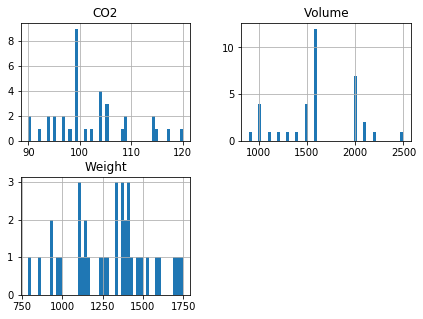

In [5]:
df.hist(bins = 50, figsize=(7,5))
plt.show()

In [6]:
df.shape

(36, 5)

### Basic insight of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [8]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [9]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

### Descriptive Statistic

In [10]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Volume,36.0,1611.111111,388.975047,900.0,1475.00,1600.0,2000.00,2500.0
Weight,36.0,1292.277778,242.123889,790.0,1117.25,1329.0,1418.25,1746.0
CO2,36.0,102.027778,7.454571,90.0,97.75,99.0,105.00,120.0


### Handling Missing dat

In [12]:
missing_data = df.isnull()
missing_data

,Car,Model,Volume,Weight,CO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Check the number of missing_data per column

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Car
False    36
Name: Car, dtype: int64

Model
False    36
Name: Model, dtype: int64

Volume
False    36
Name: Volume, dtype: int64

Weight
False    36
Name: Weight, dtype: int64

CO2
False    36
Name: CO2, dtype: int64



In [14]:
df.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


### Continuous Numerical Variable


##### Check if Volume will be a better prediction of CO2

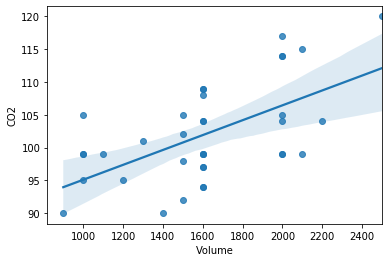

In [15]:
sns.regplot(x = "Volume", y = "CO2", data = df)

##### Check if Weight will be a better prediction of CO2

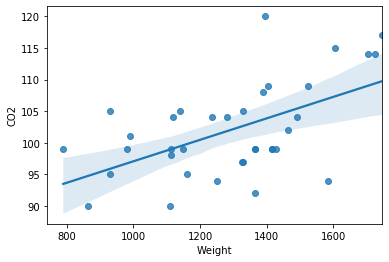

In [16]:
sns.regplot(x = "Weight", y = "CO2", data = df)

#### Categorical Data

**We want to check if Car will be a good prediction of CO2 by using boxplot**

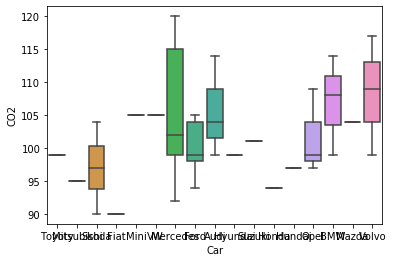

In [17]:
sns.boxplot(x = "Car", y = "CO2", data = df)

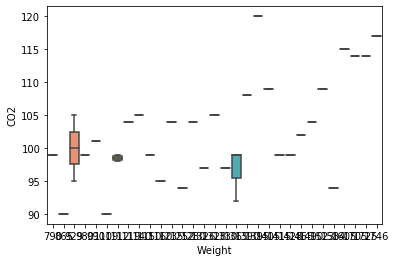

In [18]:
sns.boxplot(x = "Weight", y = "CO2", data = df)

#### Check the number of different cars in the Car by using value_counts() method

In [19]:
Car_value_count = df["Car"].value_counts()
Car_value_count[:10]

Ford          5
Mercedes      5
Skoda         4
Audi          3
Volvo         3
BMW           3
Opel          3
Fiat          1
Mitsubishi    1
Mini          1
Name: Car, dtype: int64

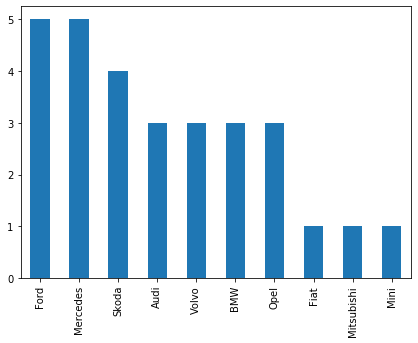

In [20]:
Car_value_count[:10].plot(kind = "bar", figsize=(7, 5))

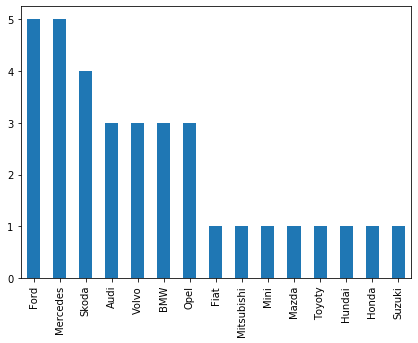

In [21]:
Car_value_count[:15].plot(kind = "bar", figsize=(7, 5))

### Declare the column to use as features

In [22]:
features = ["Volume"]

#### Declare the Prediction Target

In [23]:
target = ["CO2"]

##### Separate the features and the target into different data frame

In [24]:
X = df[features].values

In [25]:
y = df[target].values

In [26]:
print(X)

[[1000]
 [1200]
 [1000]
 [ 900]
 [1500]
 [1000]
 [1400]
 [1500]
 [1500]
 [1600]
 [1100]
 [1300]
 [1000]
 [1600]
 [1600]
 [1600]
 [1600]
 [2200]
 [1600]
 [2000]
 [1600]
 [2000]
 [2100]
 [1600]
 [2000]
 [1500]
 [2000]
 [2000]
 [1600]
 [2000]
 [2100]
 [2000]
 [1600]
 [1600]
 [1600]
 [2500]]


In [27]:
print(y)

[[ 99]
 [ 95]
 [ 95]
 [ 90]
 [105]
 [105]
 [ 90]
 [ 92]
 [ 98]
 [ 99]
 [ 99]
 [101]
 [ 99]
 [ 94]
 [ 97]
 [ 97]
 [ 99]
 [104]
 [104]
 [105]
 [ 94]
 [ 99]
 [ 99]
 [ 99]
 [ 99]
 [102]
 [104]
 [114]
 [109]
 [114]
 [115]
 [117]
 [104]
 [108]
 [109]
 [120]]


### Split the dataset into Training set and  Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print(X_train)

[[1300]
 [2000]
 [2000]
 [2500]
 [1600]
 [1600]
 [1600]
 [1500]
 [1600]
 [1000]
 [2200]
 [1600]
 [1500]
 [2000]
 [1200]
 [1000]
 [1500]
 [2000]
 [1400]
 [1600]
 [1500]
 [1600]
 [2000]
 [2000]
 [1600]
 [1600]
 [ 900]
 [1000]]


In [30]:
print(X_test)

[[2000]
 [1600]
 [1600]
 [2100]
 [2100]
 [1600]
 [1100]
 [1000]]


In [31]:
print(y_train)

[[101]
 [114]
 [114]
 [120]
 [108]
 [109]
 [104]
 [ 98]
 [ 94]
 [105]
 [104]
 [ 97]
 [ 92]
 [104]
 [ 95]
 [ 99]
 [102]
 [ 99]
 [ 90]
 [ 99]
 [105]
 [104]
 [ 99]
 [105]
 [ 99]
 [109]
 [ 90]
 [ 99]]


In [32]:
print(y_test)

[[117]
 [ 94]
 [ 99]
 [115]
 [ 99]
 [ 97]
 [ 99]
 [ 95]]


### Train the Decision_Regression on the Training set

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [34]:
print(X_train)

[[1300]
 [2000]
 [2000]
 [2500]
 [1600]
 [1600]
 [1600]
 [1500]
 [1600]
 [1000]
 [2200]
 [1600]
 [1500]
 [2000]
 [1200]
 [1000]
 [1500]
 [2000]
 [1400]
 [1600]
 [1500]
 [1600]
 [2000]
 [2000]
 [1600]
 [1600]
 [ 900]
 [1000]]


In [35]:
print(y_train)

[[101]
 [114]
 [114]
 [120]
 [108]
 [109]
 [104]
 [ 98]
 [ 94]
 [105]
 [104]
 [ 97]
 [ 92]
 [104]
 [ 95]
 [ 99]
 [102]
 [ 99]
 [ 90]
 [ 99]
 [105]
 [104]
 [ 99]
 [105]
 [ 99]
 [109]
 [ 90]
 [ 99]]


### Visualising the Training Results

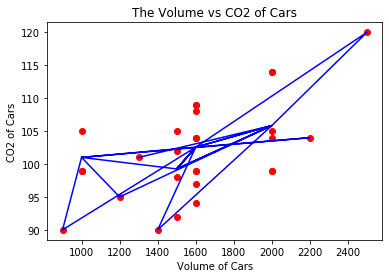

In [36]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("The Volume vs CO2 of Cars")
plt.xlabel("Volume of Cars")
plt.ylabel("CO2 of Cars")
plt.show()

### Visualising the Test Results

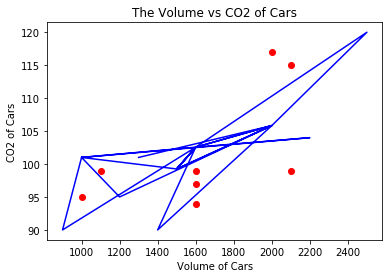

In [37]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("The Volume vs CO2 of Cars")
plt.xlabel("Volume of Cars")
plt.ylabel("CO2 of Cars")
plt.show()

### Let Visualize the DecisionTreeRegression on higher resolution

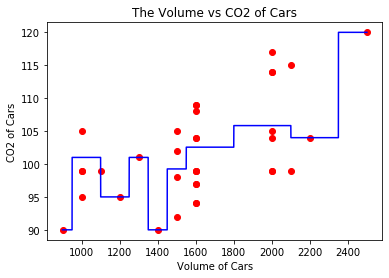

In [38]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'r')
plt.plot(X_grid, regressor.predict(X_grid), color = 'b')
plt.title("The Volume vs CO2 of Cars")
plt.xlabel("Volume of Cars")
plt.ylabel("CO2 of Cars")
plt.show()

### Preidct the Test results

In [39]:
y_pred = regressor.predict(X_test)
y_pred

array([105.83333333, 102.55555556, 102.55555556, 105.83333333,
       105.83333333, 102.55555556, 101.        , 101.        ])

### Evaluating the Model Performance

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.26258936189600424

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
RMSE = sqrt(mean_squared_error(y_test, y_pred))
RMSE

7.177398295782137